In [99]:
import subprocess
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from typing import List
import matplotlib.pyplot as plt
%matplotlib inline  

ini_format = """
[General]
network = Scheduler
**.serverCount = {}
**.server[*].serviceTime = {}s
**.source.interArrivalTime = exponential({}s)  
**.source.numJobs = {}
**.registrar.acceptenceRate = 0.9
repeat = 1000
"""

def ini_gen(service_time=1, students=700, inter_arrival_time=0.5, server_count=1):
    contents = ini_format.format(server_count, service_time, inter_arrival_time, students)
    with open("custom.ini", "w") as f:
        f.write(contents)
        
def run_omnetpp():
    subprocess.call("rm results/totaled.csv", shell=True)
    subprocess.call("opp_runall -j24 -b41 ./FinalProjectTry2 -m -u Cmdenv -n .:../queueinglib -l ../queueinglib/queueinglib custom.ini -c General", shell=True)
    subprocess.call("cd results && scavetool x *.sca -o totaled.csv", shell=True)
    a = pd.read_csv("results/totaled.csv")
    return a.pivot_table(columns="name", values="value", index="run")

    
def process_results(dataset):
    def process_column(param, nice_name): 
        values = dataset[param].dropna() 
        return {f"{nice_name} Mean": values.mean(), f"{nice_name} SE": values.sem(),
                f"{nice_name} Std. Dev": values.std(), f"{nice_name} %Err": 100 * values.sem() / values.mean()}
        
    results = process_column("lifeTime:max", "Max Registration Time")
    results.update(process_column("lifeTime:mean", "Mean Registration Time"))
    results.update(process_column("queueLength:max","Max Queue Length"))
    return results

def run_simulation(service_time=1, students=700, inter_arrival_time=0.5, server_count=1):
    ini_gen(service_time, students, inter_arrival_time, server_count) 
    a = run_omnetpp()
    results = process_results(a)
    results["Service Time"] = service_time
    results["Students"] = students
    results["Inter-arrival Time"] = inter_arrival_time
    results["Server Count"] = server_count
    return results 

def fix_order(columns):
    columns = list(columns)
    for c in ["Service Time", "Students", "Inter-arrival Time", "Server Count"]:
        columns.remove(c)
        columns.insert(0, c)
    return columns

def pretty_format(data):
    return pd.DataFrame(data, columns=fix_order(data[0].keys()))

def save_plot(name):
    plt.savefig(f"images/{name}.png", dpi=300)

In [82]:
run_simulation(1, 100)

{'Max Registration Time Mean': 83.55854493959164,
 'Max Registration Time SE': 0.29442697185679984,
 'Max Registration Time Std. Dev': 9.310598356537822,
 'Max Registration Time %Err': 0.3523600992210369,
 'Mean Registration Time Mean': 31.66950963124321,
 'Mean Registration Time SE': 0.106778243995269,
 'Mean Registration Time Std. Dev': 3.3766245557824757,
 'Mean Registration Time %Err': 0.33716418485345945,
 'Max Queue Length Mean': 55.267,
 'Max Queue Length SE': 0.1497201627274267,
 'Max Queue Length Std. Dev': 4.734567258697159,
 'Max Queue Length %Err': 0.2709033649871111,
 'Service Time': 1,
 'Students': 100,
 'Inter-arrival Time': 0.5,
 'Server Count': 1}

In [92]:
# student_trials = pretty_format([run_simulation(students=s) for s in tqdm_notebook(np.linspace(700, 1500, 10, dtype=int))])
# service_time_trials = pretty_format([run_simulation(service_time=s) for s in tqdm_notebook(np.linspace(0.5, 10, 10))])
# iit = pretty_format([run_simulation(inter_arrival_time=s) for s in tqdm_notebook(np.linspace(0, 10, 20))]) 
server_trials = pretty_format([run_simulation(server_count=s) for s in tqdm_notebook(np.linspace(1, 10, 10, dtype=int))])

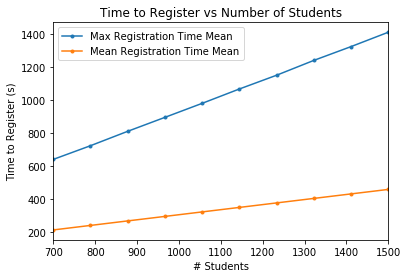

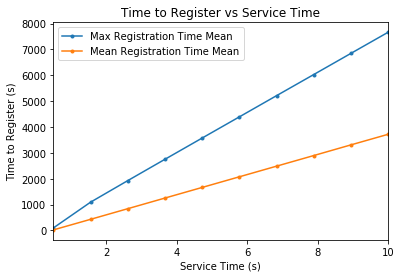

In [77]:
def plot_values(frame, x_col, y_cols, style=".-"):
    frame[[x_col] + y_cols].plot(x=x_col, style=style)

plot_values(student_trials, "Students", ["Max Registration Time Mean", "Mean Registration Time Mean"])
plt.xlabel("# Students")
plt.ylabel("Time to Register (s)")
plt.title("Time to Register vs Number of Students")
save_plot("Time to Register vs Number of Students")

plot_values(service_time_trials, "Service Time", ["Max Registration Time Mean", "Mean Registration Time Mean"])
plt.xlabel("Service Time (s)")
plt.ylabel("Time to Register (s)")
plt.title("Time to Register vs Service Time")
save_plot("Time to Register vs Service Time")



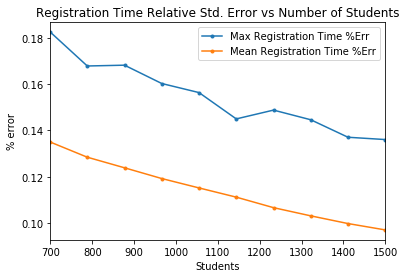

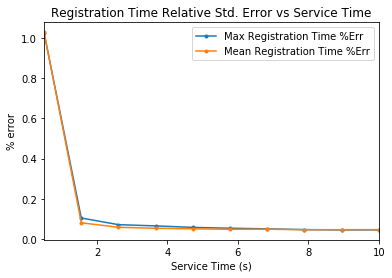

In [68]:
plot_values(student_trials, "Students", ["Max Registration Time %Err", "Mean Registration Time %Err"])
plt.ylabel("% error")
plt.title("Registration Time Relative Std. Error vs Number of Students")
save_plot("Registration Time Relative Std. Error vs Number of Students")

plot_values(service_time_trials, "Service Time", ["Max Registration Time %Err", "Mean Registration Time %Err"])
plt.xlabel("Service Time (s)")
plt.ylabel("% error")
plt.title("Registration Time Relative Std. Error vs Service Time")
save_plot("Registration Time Relative Std. Error vs Service Time")

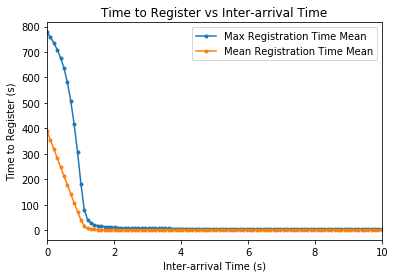

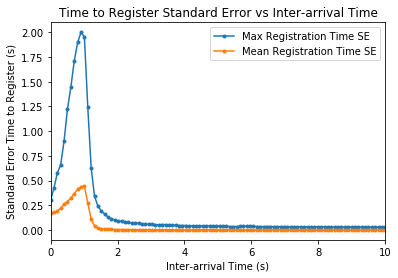

In [78]:
plot_values(iit, "Inter-arrival Time", ["Max Registration Time Mean", "Mean Registration Time Mean"])
plt.xlabel("Inter-arrival Time (s)")
plt.ylabel("Time to Register (s)")
plt.title("Time to Register vs Inter-arrival Time")
save_plot("Time to Register vs Inter-arrival Time")

plot_values(iit, "Inter-arrival Time", ["Max Registration Time SE", "Mean Registration Time SE"])
plt.xlabel("Inter-arrival Time (s)")
plt.ylabel("Standard Error Time to Register (s)")
plt.title("Time to Register Standard Error vs Inter-arrival Time")
save_plot("Time to Register Standard Error vs Inter-arrival Time")

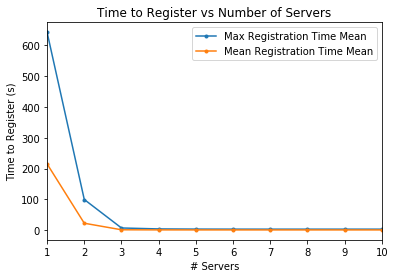

In [93]:
plot_values(server_trials, "Server Count", ["Max Registration Time Mean", "Mean Registration Time Mean"])
plt.xlabel("# Servers")
plt.ylabel("Time to Register (s)")
plt.title("Time to Register vs Number of Servers")
save_plot("Time to Register vs Number of Servers")


In [34]:
student_trials.round(2)

Inter-arrival Time  Students  Service Time  Max Registration Time mean  \
0                 0.5       700             1                      323.47   
1                 0.5       788             1                      364.43   
2                 0.5       877             1                      408.03   
3                 0.5       966             1                      450.27   
4                 0.5      1055             1                      492.66   
5                 0.5      1144             1                      536.11   
6                 0.5      1233             1                      577.75   
7                 0.5      1322             1                      622.61   
8                 0.5      1411             1                      664.37   
9                 0.5      1500             1                      707.84   

   Max Registration Time sem  Max Registration Time stdev  \
0                       7.15                       319.87   
1                       8.07                       360.79   
2                       9.05                       404.53   
3                       9.99                       446.77   
4                      10.94                       489.23   
5                      11.91                       532.61   
6                      12.84                       574.41   
7                      13.85                       619.31   
8                      14.78                       661.02   
9                      15.75                       704.57   

   Max Registration Time %err  Mean Registration Time mean  \
0                        2.21                       108.21   
1                        2.21                       121.72   
2                        2.22                       135.38   
3                        2.22                       149.00   
4                        2.22                       162.62   
5                        2.22                       176.20   
6                        2.22                       189.84   
7                        2.22                       203.47   
8                        2.22                       217.10   
9                        2.23                       230.67   

   Mean Registration Time sem  Mean Registration Time stdev  \
0                        2.40                        107.24   
1                        2.70                        120.76   
2                        3.01                        134.43   
3                        3.31                        148.06   
4                        3.62                        161.69   
5                        3.92                        175.28   
6                        4.22                        188.92   
7                        4.53                        202.54   
8                        4.83                        216.18   
9                        5.14                        229.76   

   Mean Registration Time %err  Max Queue Length mean  Max Queue Length sem  \
0                         2.22                 193.94                  4.29   
1                         2.22                 218.24                  4.84   
2                         2.22                 242.79                  5.39   
3                         2.22                 267.32                  5.94   
4                         2.22                 291.75                  6.48   
5                         2.22                 316.20                  7.03   
6                         2.23                 340.75                  7.58   
7                         2.23                 365.22                  8.12   
8                         2.23                 389.79                  8.67   
9                         2.23                 414.21                  9.22   

   Max Queue Length stdev  Max Queue Length %err  
0                  192.02                   2.21  
1                  216.33                   2.22  
2                  240.89                   2.22  
3                  265.43       

In [76]:
iit = pretty_format([run_simulation(inter_arrival_time=s) for s in tqdm_notebook(np.linspace(0, 10, 100))]) 


In [98]:
inv_student = pretty_format([run_simulation(students=s) for s in tqdm_notebook("500 750 1000 1250 1500".split(" "))])



[General]
network = Scheduler
**.serverCount = 1
**.server[*].serviceTime = 1s
**.source.interArrivalTime = exponential(0.5s)  
**.source.numJobs = 500
**.registrar.acceptenceRate = 0.9
repeat = 1000


[General]
network = Scheduler
**.serverCount = 1
**.server[*].serviceTime = 1s
**.source.interArrivalTime = exponential(0.5s)  
**.source.numJobs = 750
**.registrar.acceptenceRate = 0.9
repeat = 1000


[General]
network = Scheduler
**.serverCount = 1
**.server[*].serviceTime = 1s
**.source.interArrivalTime = exponential(0.5s)  
**.source.numJobs = 1000
**.registrar.acceptenceRate = 0.9
repeat = 1000


[General]
network = Scheduler
**.serverCount = 1
**.server[*].serviceTime = 1s
**.source.interArrivalTime = exponential(0.5s)  
**.source.numJobs = 1250
**.registrar.acceptenceRate = 0.9
repeat = 1000


[General]
network = Scheduler
**.serverCount = 1
**.server[*].serviceTime = 1s
**.source.interArrivalTime = exponential(0.5s)  
**.source.numJobs = 1500
**.registrar.acceptenceRate = 0.9
re

In [96]:
inv_student.round(3)

Server Count  Inter-arrival Time Students  Service Time  \
0             1                 0.5      500             1   
1             1                 0.5      750             1   
2             1                 0.5     1000             1   
3             1                 0.5     1250             1   
4             1                 0.5     1500             1   

   Max Registration Time Mean  Max Registration Time SE  \
0                     451.107                     0.942   
1                     688.814                     1.192   
2                     929.184                     1.479   
3                    1168.683                     1.649   
4                    1410.929                     1.920   

   Max Registration Time Std. Dev  Max Registration Time %Err  \
0                          29.786                       0.209   
1                          37.683                       0.173   
2                          46.774                       0.159   
3                          52.142                       0.141   
4                          60.712                       0.136   

   Mean Registration Time Mean  Mean Registration Time SE  \
0                      154.040                      0.247   
1                      230.553                      0.303   
2                      307.224                      0.362   
3                      383.717                      0.406   
4                      460.150                      0.446   

   Mean Registration Time Std. Dev  Mean Registration Time %Err  \
0                            7.797                        0.160   
1                            9.569                        0.131   
2                           11.438                        0.118   
3                           12.851                        0.106   
4                           14.116                        0.097   

   Max Queue Length Mean  Max Queue Length SE  Max Queue Length Std. Dev  \
0                275.401                0.352                     11.137   
1                413.176                0.442                     13.963   
2                551.097                0.520                     16.455   
3                688.632                0.571                     18.068   
4                826.213                0.630                     19.930   

   Max Queue Length %Err  
0                  0.128  
1                  0.107  
2                  0.094  
3                  0.083  
4                  0.076